# DUDE-Seq Evaluation for Denoiser
This notebook performs evaluation on the denoising capability of DUDE-Seq fasta files used in the Haplo-Reader project.

The input files used are generated using the custom simulation functions in VariantCalling.py

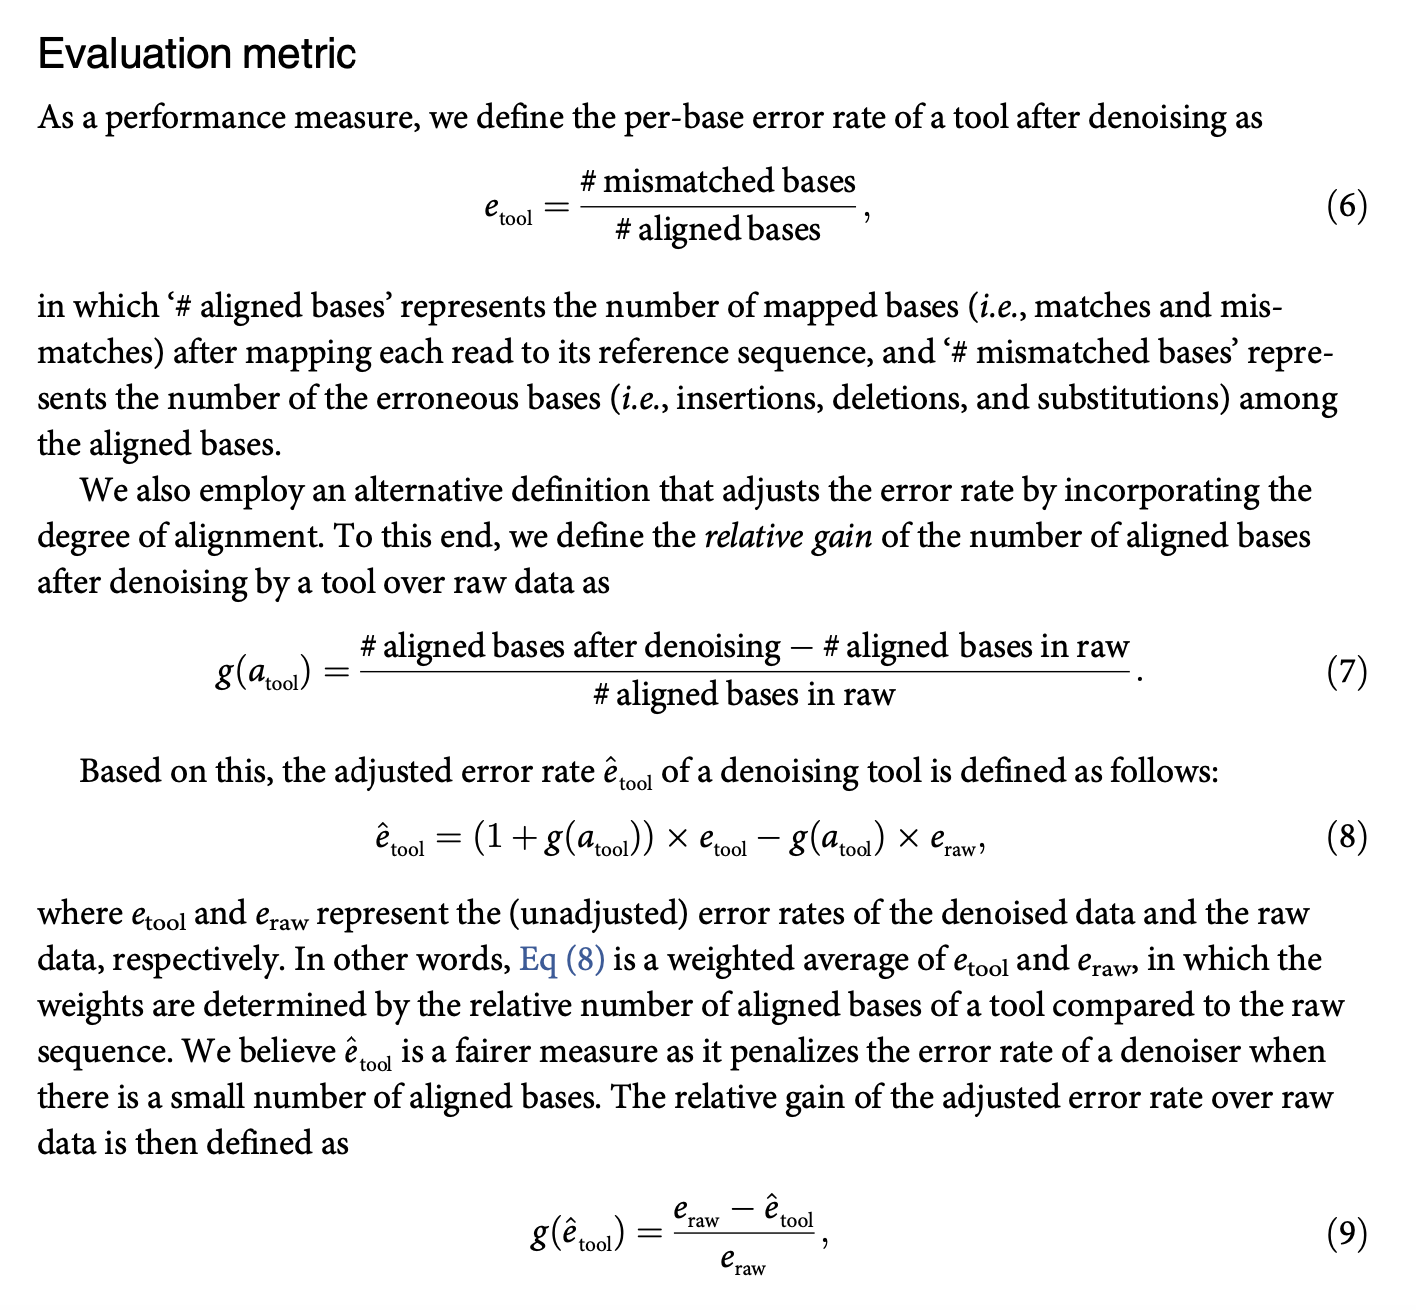

## Installing the Dependencies

### Cloning the DUDE-Seq Repo


In [1]:
!git clone https://github.com/datasnu/dude-seq
!sudo apt-get install libboost-dev libgsl0-dev liblapack-dev zlib1g-dev
!sudo mv /content/dude-seq/* /content
!mkdir bin/
!sudo make && make install

Cloning into 'dude-seq'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Receiving objects: 100% (30/30), 13.55 MiB | 9.25 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgsl-dev' instead of 'libgsl0-dev'
libboost-dev is already the newest version (1.74.0.3ubuntu7).
libboost-dev set to manually installed.
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-2ubuntu9.2).
zlib1g-dev set to manually installed.
The following additional packages will be installed:
  libgsl27 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl27 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,351 kB of archives.
After this op

## Create the pi file for our input noisy image

Here we compute the confusion matrix for the simulated input files

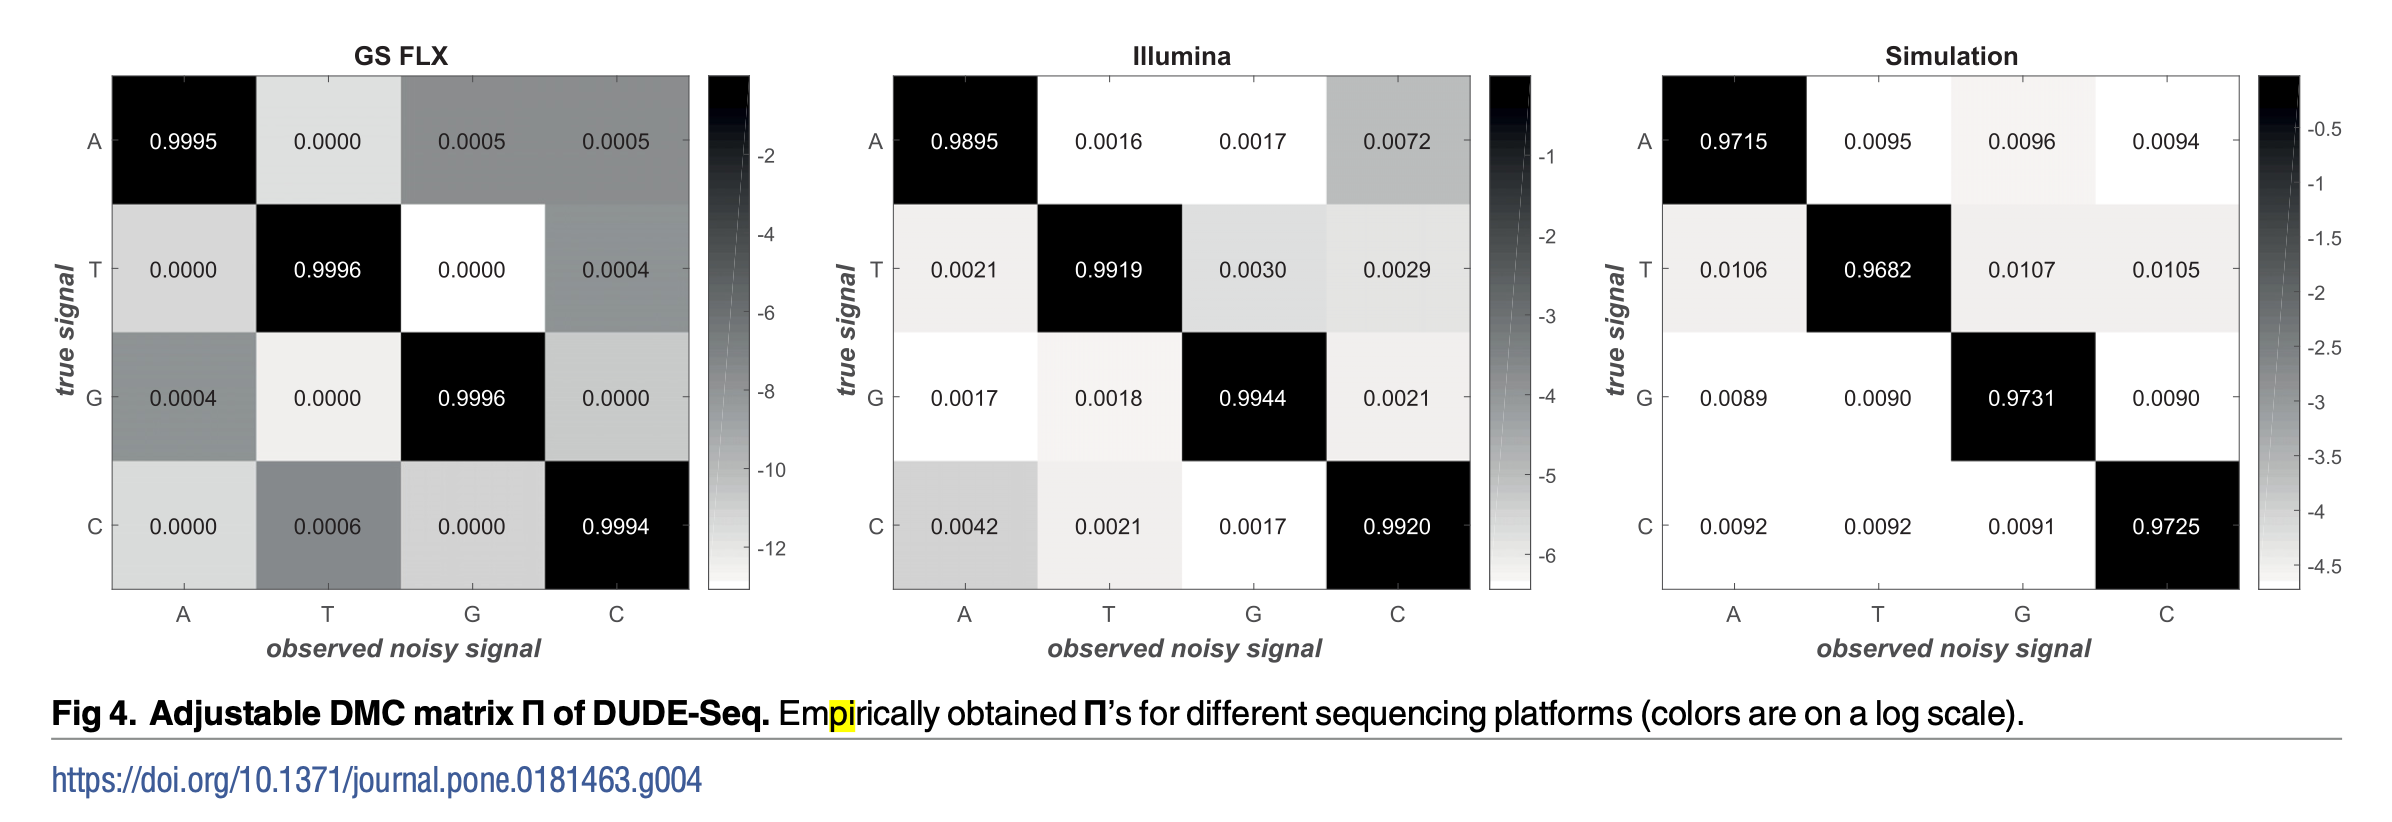

In [37]:
 # Read the input files
nucleotides = ["A","T","G","C"]
A = [0,0,0,0]
T = [0,0,0,0]
G = [0,0,0,0]
C = [0,0,0,0]
noisy_in = "noisy-9.fasta"
denoised_in = "noisy-9_S5.fasta"
clean_in = "clean-9.fasta"
with open(noisy_in) as file:
    noisy_list = [line.rstrip() for line in file]
with open(clean_in) as file:
    clean_list = [line.rstrip() for line in file]

for i in range(len(clean_list)):
  if ">" not in clean_list[i]:
    cur_clean = list(clean_list[i])
    cur_noisy = list(noisy_list[i])
    for j in range(len(cur_clean)):
      if cur_clean[j] == "A":
        A[nucleotides.index(cur_noisy[j])] += 1
      elif cur_clean[j] == "T":
        T[nucleotides.index(cur_noisy[j])] += 1
      elif cur_clean[j] == "G":
        G[nucleotides.index(cur_noisy[j])] += 1
      elif cur_clean[j] == "C":
        C[nucleotides.index(cur_noisy[j])] += 1

print(A)
print(T)
print(G)
print(C)

[147270, 23118, 35432, 32975]
[22589, 115189, 25288, 26841]
[35860, 24903, 156679, 23795]
[32596, 26229, 24137, 137099]


In [38]:
print([x / sum(A) for x in A])
print([x / sum(T) for x in T])
print([x / sum(G) for x in G])
print([x / sum(C) for x in C])

[0.6167214556418685, 0.09681107225863188, 0.14837831612889718, 0.1380891559706024]
[0.11894769545093124, 0.6065547873432785, 0.13315991511634642, 0.1413376020894438]
[0.14865049722886622, 0.1032304331425113, 0.6494816300982021, 0.0986374395304203]
[0.14812256601578652, 0.11918967922530571, 0.10968322419692722, 0.6230045305619806]


## Running the Example

In [46]:
!pwd
#!dude-seq/DUDE-Seq-all.sh [DAT_FILE]
#!./DUDE-Seq-1.sh /content/Example/Artificial.fasta
#!./DUDE-Seq-1.sh /content/noisy-5.fasta
!./bin/DUDE-Seq-1 -i /content/noisy-9.fasta -p /content/noise_model_0_01.pi -k 5 -o /content/noisy-9_S5.fasta
#!./bin/DUDE-Seq-1 -i /content/noisy.fasta -o /content/noisy_D2_K2.fasta -k 2

/content
Getting noise distribution...
Correcting errors...

Elapsed time: 1.64511s


## Comparing the performance

In [47]:
with open(noisy_in) as file:
    noisy_list = [line.rstrip() for line in file]
with open(denoised_in) as file:
    denoised_list = [line.rstrip() for line in file]
with open(clean_in) as file:
    clean_list = [line.rstrip() for line in file]

In [48]:
num_aligned_bases_in_raw = 0
num_mismatched_bases_in_raw = 0
num_aligned_bases_in_denoised = 0
num_mismatched_bases_in_denoised = 0
total_bases = 0

print("Length of clean_list: ", len(clean_list))
print("Length of denoised_list: ", len(denoised_list))
print("Length of noisy_list: ", len(noisy_list))

for i in range(len(clean_list)):
  if ">" not in clean_list[i]:
    cur_clean = list(clean_list[i])
    cur_noisy = list(noisy_list[i])
    cur_denoised = list(denoised_list[i])
    for j in range(len(cur_clean)):
        if cur_noisy[j] == cur_clean[j]:
            num_aligned_bases_in_raw += 1
        else:
            num_mismatched_bases_in_raw += 1
        if cur_denoised[j] == cur_clean[j]:
            num_aligned_bases_in_denoised += 1
        else:
            num_mismatched_bases_in_denoised += 1
        total_bases += 1

Length of clean_list:  10000
Length of denoised_list:  10000
Length of noisy_list:  10000


In [49]:
print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
print("total_bases: ", total_bases)


e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
g_adj_tool = (e_raw - e_adj_tool)/e_raw

print("e_raw: ",e_raw)
print("e_tool: ", e_tool)
print("g_tool: ", g_tool)
print("e_adj_tool: ", e_adj_tool)
print("g_adj_tool: ", g_adj_tool)

num_aligned_bases_in_raw:  556237
num_mismatched_bases_in_raw:  333763
num_aligned_bases_in_denoised:  560158
num_mismatched_bases_in_denoised:  329842
total_bases:  890000
e_raw:  0.6000373941323572
e_tool:  0.5888374351522249
g_tool:  0.007049153508306711
e_adj_tool:  0.5887584849220873
g_adj_tool:  0.01879701052061774


num_aligned_bases_in_raw:  5867158
num_mismatched_bases_in_raw:  11932842
num_aligned_bases_in_denoised:  5867192
num_mismatched_bases_in_denoised:  11932808
total_bases:  17800000
e_raw:  2.033836825256794
e_tool:  2.0338192443676633
g_tool:  5.7949692167826395e-06
e_adj_tool:  2.033819244265782
g_adj_tool:  8.64424854225014e-06